In [1]:
import pandas as pd
import numpy as np

In [2]:
weather = pd.read_csv('../data/dataset.csv', encoding = 'utf-8') #파일 불러오기
weather.head()

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%),폭염특보(O/X),폭염영향예보(단계),열대야(O/X),자외선지수(단계)
0,2022-07-01,북강릉(104),X,32.0,31.7,27.4,22.3,72.1,O,주의,X,매우높음
1,2022-07-01,동해(106),X,30.4,30.3,25.8,21.7,76.4,O,주의,X,매우높음
2,2022-07-01,서울(108),X,31.8,30.9,26.6,21.9,83.3,O,관심,X,높음
3,2022-07-01,인천(112),X,30.0,28.1,25.6,23.6,86.0,O,관심,X,매우높음
4,2022-07-01,원주(114),X,31.5,32.0,26.6,21.0,72.9,O,관심,X,매우높음


In [4]:
a = weather['지점'] #총 162개의 지역의 날씨조사
a

0       북강릉(104)
1        동해(106)
2        서울(108)
3        인천(112)
4        원주(114)
          ...   
3721     북춘천(93)
3722     하동(932)
3723      철원(95)
3724     동두천(98)
3725      파주(99)
Name: 지점, Length: 3726, dtype: object

In [5]:
a.drop_duplicates() #중복되는 행을 제거

0      북강릉(104)
1       동해(106)
2       서울(108)
3       인천(112)
4       원주(114)
         ...   
157     북춘천(93)
158     하동(932)
159      철원(95)
160     동두천(98)
161      파주(99)
Name: 지점, Length: 162, dtype: object

In [13]:
a

0       북강릉(104)
1        동해(106)
2        서울(108)
3        인천(112)
4        원주(114)
          ...   
3721     북춘천(93)
3722     하동(932)
3723      철원(95)
3724     동두천(98)
3725      파주(99)
Name: 지점, Length: 3726, dtype: object

In [6]:
weather.describe() #대략적인 수치 확인

,최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%)
count,3656.000000,3591.000000,3589.000000,3591.000000,3541.000000
mean,31.301368,30.608187,25.959404,22.387441,81.010788
std,2.090258,2.793510,1.831959,1.636293,7.578007
min,23.600000,20.900000,18.800000,16.300000,57.000000
25%,29.900000,28.900000,24.700000,21.200000,76.000000
50%,31.500000,30.800000,26.100000,22.500000,81.000000
75%,33.000000,32.800000,27.300000,23.500000,86.000000
max,35.900000,37.300000,31.800000,28.600000,100.000000


In [7]:
weather_0 = weather.drop(['열대야(O/X)','자외선지수(단계)', \
              '폭염영향예보(단계)','폭염특보(O/X)'], axis=1) 
#폭염과 기온, 습도, 체감온도의 상관관계를 보는데 필요없는 열 제거(weather_0) [del 사용도가능]

weather_0.sort_values(by = '최고체감온도(°C)', ascending = False)
#최고 체감온도에 따른 내림차순(살펴보면 데이터가 NaN인 것들도 다수 있다)

,일시,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%)
1565,2022-07-10,진천(602),O,35.9,36.3,28.8,22.7,74.0
1002,2022-07-07,제주(184),O,35.7,35.9,31.8,28.6,68.9
290,2022-07-02,담양(706),O,35.6,36.4,28.3,20.8,77.0
746,2022-07-05,화천(555),O,35.6,34.9,26.5,22.5,89.0
1586,2022-07-10,담양(706),O,35.5,34.2,28.2,22.7,85.0
...,...,...,...,...,...,...,...,...
3484,2022-07-22,의왕(445),X,NaN,NaN,NaN,NaN,NaN
3524,2022-07-22,연천청산(652),X,NaN,NaN,NaN,NaN,NaN
3644,2022-07-23,김포(441),X,NaN,28.1,24.0,21.7,NaN
3646,2022-07-23,의왕(445),X,NaN,NaN,NaN,NaN,NaN


In [8]:
weather_0.set_index('일시' , inplace = True)   #22-7-1일자 데이터 추출
weather_1 = weather_0.loc['2022-07-01',:]
weather_1.head(20)

,지점,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%)
일시,,,,,,,
2022-07-01,북강릉(104),X,32.0,31.7,27.4,22.3,72.1
2022-07-01,동해(106),X,30.4,30.3,25.8,21.7,76.4
2022-07-01,서울(108),X,31.8,30.9,26.6,21.9,83.3
2022-07-01,인천(112),X,30.0,28.1,25.6,23.6,86.0
2022-07-01,원주(114),X,31.5,32.0,26.6,21.0,72.9
2022-07-01,울릉도(115),X,31.7,30.4,27.2,23.8,73.8
2022-07-01,수원(119),X,32.1,31.4,27.3,23.4,79.3
2022-07-01,영월(121),X,32.3,32.5,26.2,22.0,77.8
2022-07-01,충주(127),O,33.0,33.2,27.6,22.6,76.8


In [9]:
import matplotlib.pyplot as plt

In [10]:
weather_1.set_index('지점',inplace = True)   #지점을 기준으로 재배열
weather_1.head()

,폭염여부(O/X),최고체감온도(°C),최고기온(°C),평균기온(°C),최저기온(°C),평균상대습도(%)
지점,,,,,,
북강릉(104),X,32.0,31.7,27.4,22.3,72.1
동해(106),X,30.4,30.3,25.8,21.7,76.4
서울(108),X,31.8,30.9,26.6,21.9,83.3
인천(112),X,30.0,28.1,25.6,23.6,86.0
원주(114),X,31.5,32.0,26.6,21.0,72.9


In [11]:
import platform                                  #폰트변경
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system... Sorry')

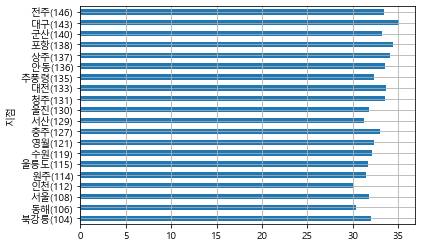

In [12]:
weather_2 = weather_1.head(20)  #데이터가 너무 많아 20개만 추출
weather_2['최고체감온도(°C)'].plot(kind = 'barh', grid = True) #지역별 최고체감온도를 막대그래프로 표현
plt.show()